# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [ ]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [71]:
happiness_report = pd.read_csv('world-happiness-report-2019.csv')
happiness_report.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [ ]:
# Посмотрела всю таблицу и увидела, что для Qatar практически все показатели NaN. Решила удалить эту строку из датасета. 

In [74]:
happiness_report.drop([28], inplace=True)

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

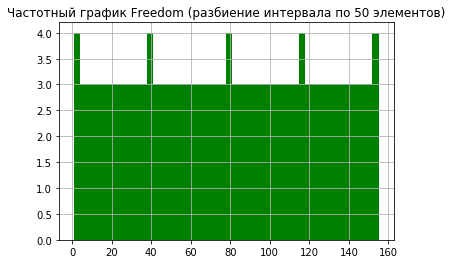

In [126]:
n, bins, patches = plt.hist(happiness_report['Freedom'], 50, facecolor='g')

plt.title('Частотный график Freedom (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

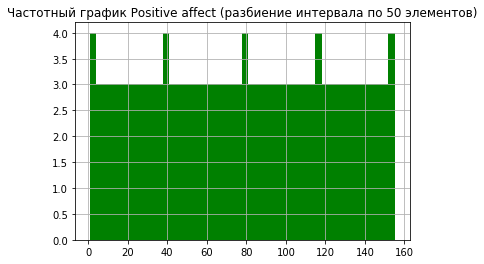

In [102]:
n, bins, patches = plt.hist(happiness_report['Positive affect'], 50, facecolor='g')

plt.title('Частотный график Positive affect (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [ ]:
# Что касается типов распредления. Изучила, какие типы есть, но не смогла классифицировать типы этих двух графиков.

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [78]:
# Медиана
print('Медиана: ', statistics.median(happiness_report['Freedom']))

Медиана:  78.0


In [ ]:
# Моду найти нельзя

In [79]:
# Математическое ожидание
statistics.mean(happiness_report['Freedom'])

78.0

In [80]:
# Стандартное отклонение
statistics.pstdev(happiness_report['Freedom'])

44.74371464239419

In [81]:
# Дисперсия
statistics.pvariance(happiness_report['Freedom'])

2002.0

In [82]:
# Минимальное значеие
min(happiness_report['Freedom'])

1.0

In [83]:
# Максимальное значение
max(happiness_report['Freedom'])

155.0

In [18]:
# Размах
max(happiness_report['Freedom']) - min(happiness_report['Freedom'])

154.0

In [ ]:
# Выбросов нет

Почему нельзя найти моду?

In [0]:
# Потому что каждое значение встречается только один раз. 

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

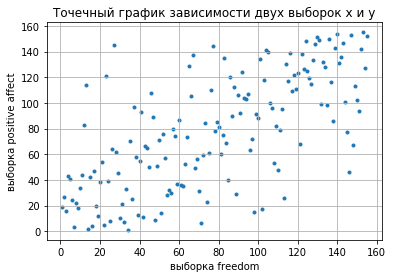

In [84]:
freedom = happiness_report['Freedom']
positive_affect = happiness_report['Positive affect']
plt.xlabel('выборка freedom')
plt.ylabel('выборка positive affect')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [87]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(happiness_report['Freedom'], happiness_report['Positive affect'])
print('Коэффицент Пирсона: ',corr)

Коэффицент Пирсона:  0.6817698430601656


In [ ]:
# В данном случае между параметрами прямая корреляция. Чем выше показатель positive affect, тем больше параметр freedom.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [103]:
freedom1 = happiness_report['Freedom']
print(statistics.mean(freedom1))

78.0


In [104]:
freedom2 = freedom1 - statistics.mean(freedom1)
print(statistics.mean(freedom2))

0.0


In [105]:
min(freedom2)

-77.0

In [106]:
max(freedom2)

77.0

In [107]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom2 = min_max_scaler.fit_transform(np.array(freedom2).reshape(-1, 1))
print(min(freedom2))
print(max(freedom2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

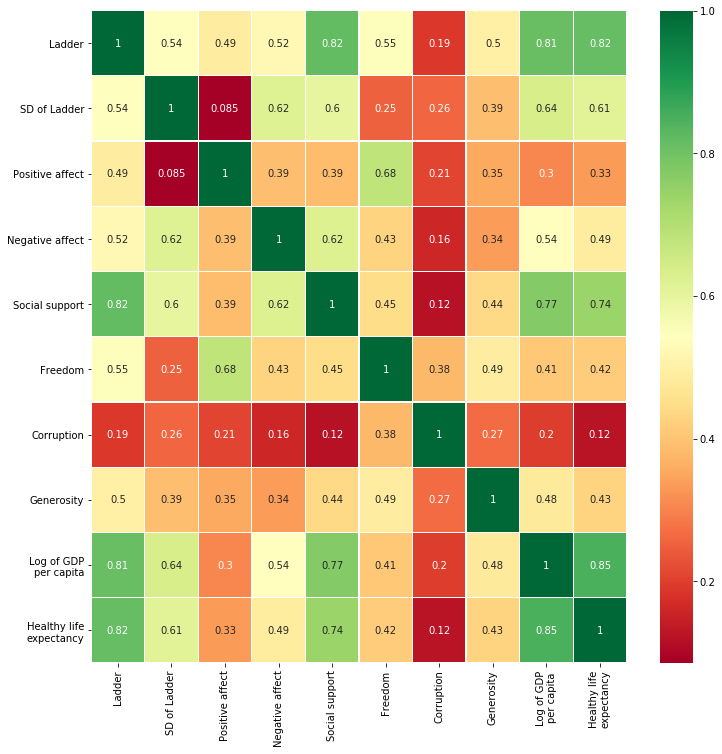

In [108]:
import seaborn as sns
sns.heatmap(happiness_report.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [88]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

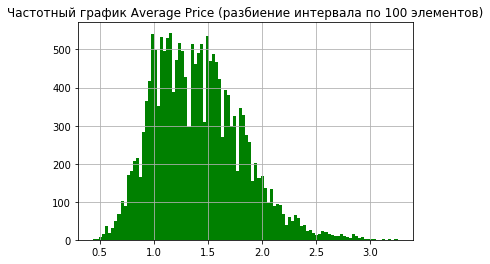

In [109]:
n, bins, patches = plt.hist(df['AveragePrice'], 100, facecolor='g')

plt.title('Частотный график Average Price (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

**Корреляции между колонками 4046, 4225, 4770 и Average Price нет. Это видно на матрице корреляции в материалах лекции (ячейки отмечены красным).**

In [120]:
corr, p_value = pearsonr(df['4046'], df['AveragePrice'])
print('Коэффицент корреляции Пирсона: ', corr)

Коэффицент корреляции Пирсона:  -0.20831704848788474


In [121]:
coef, p = sts.spearmanr(df['4046'], df['AveragePrice'])
print('Коэффицент корреляции Спирмана: %.3f' % coef)

coef, p = sts.kendalltau(df['4046'], df['AveragePrice'])
print('Коэффицент корреляции Кендалла: %.3f' % coef)

Коэффицент корреляции Спирмана: -0.596
Коэффицент корреляции Кендалла: -0.417


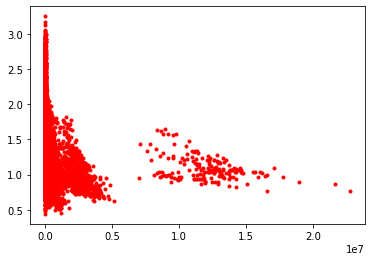

In [116]:
plt.plot(df['4046'], df['AveragePrice'], 'r.')
plt.show()

In [114]:
corr, p_value = pearsonr(df['4225'], df['AveragePrice'])
print(corr)

-0.17292777250933544


In [122]:
coef, p = sts.spearmanr(df['4225'], df['AveragePrice'])
print('Коэффицент корреляции Спирмана: %.3f' % coef)

coef, p = sts.kendalltau(df['4225'], df['AveragePrice'])
print('Коэффицент корреляции Кендалла: %.3f' % coef)

Коэффицент корреляции Спирмана: -0.514
Коэффицент корреляции Кендалла: -0.344


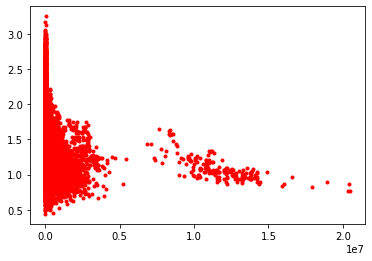

In [117]:
plt.plot(df['4225'], df['AveragePrice'], 'r.')
plt.show()

In [115]:
corr, p_value = pearsonr(df['4770'], df['AveragePrice'])
print(corr)

-0.17944598397975614


In [123]:
coef, p = sts.spearmanr(df['4770'], df['AveragePrice'])
print('Коэффицент корреляции Спирмана: %.3f' % coef)

coef, p = sts.kendalltau(df['4770'], df['AveragePrice'])
print('Коэффицент корреляции Кендалла: %.3f' % coef)

Коэффицент корреляции Спирмана: -0.533
Коэффицент корреляции Кендалла: -0.375


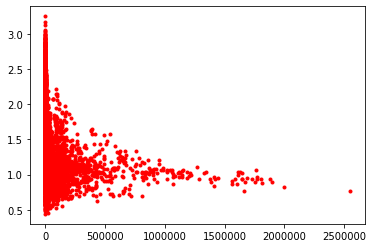

In [118]:
plt.plot(df['4770'], df['AveragePrice'], 'r.')
plt.show()